In [1]:
# import library
import pandas as pd
import numpy as np

#split data
from sklearn.model_selection import train_test_split

# preprocess
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#evaluasi
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

In [2]:
df = pd.read_csv('Dataset/sleep_health.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
3,8,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,None,120.0,80.0
4,9,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,None,120.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0
355,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0
356,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0
357,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0


In [3]:
#mengeluarkan NA
df = df.dropna()

#menangani variabel / kolom kategorik
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

#OneHotEncoder
enc = OneHotEncoder(sparse=False)
st_enc = enc.fit_transform(df[['Sleep Disorder']])
df_enc = pd.DataFrame(st_enc)
df['Sleep Apnea'] = df_enc[0]
df['insomnia'] = df_enc[1]
df['None'] = df_enc[2]

enc = OneHotEncoder(sparse=False)
st_enc = enc.fit_transform(df[['Occupation']])
df_enc = pd.DataFrame(st_enc)
df['Software Engineer'] = df_enc[0]
df['Doctor'] = df_enc[1]
df['Manager'] = df_enc[2]
df['Nurse'] = df_enc[3]
df['Engineer'] = df_enc[4]
df['Accountant'] = df_enc[5]
df['Scientist'] = df_enc[6]
df['Teacher'] = df_enc[7]
df['Lawyer'] = df_enc[8]
df['Salesperson'] = df_enc[9]

enc = OneHotEncoder(sparse=False)
st_enc = enc.fit_transform(df[['BMI Category']])
df_enc = pd.DataFrame(st_enc)
df['Underweight'] = df_enc[0]
df['Normal'] = df_enc[1]
df['Overweight'] = df_enc[2]

df

c:\Users\Lintang\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Lintang\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Lintang\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,...,Nurse,Engineer,Accountant,Scientist,Teacher,Lawyer,Salesperson,Underweight,Normal,Overweight
0,1,1,27,Software Engineer,6.1,6,42,6,Overweight,77,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,1,28,Doctor,6.2,6,60,8,Normal,75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,28,Doctor,6.2,6,60,8,Normal,75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,8,1,29,Doctor,7.8,7,75,6,Normal,70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,9,1,29,Doctor,7.8,7,75,6,Normal,70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,370,0,59,Nurse,8.1,9,75,3,Overweight,68,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
355,371,0,59,Nurse,8.0,9,75,3,Overweight,68,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
356,372,0,59,Nurse,8.1,9,75,3,Overweight,68,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
357,373,0,59,Nurse,8.1,9,75,3,Overweight,68,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
# mendifinisikan tagret dan predictor
X = df.drop(['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

In [5]:
# split menjadi train dan train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=123)

In [6]:
# membangun model
model = KNeighborsClassifier()

In [7]:
#training model
model.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
# Prediksi
y_pred = model.predict(X_test)
y_pred

array(['None', 'None', 'None', 'None', 'None', 'Insomnia', 'None', 'None',
       'Insomnia', 'None', 'Insomnia', 'Sleep Apnea', 'Insomnia', 'None',
       'None', 'Sleep Apnea', 'None', 'None', 'Insomnia', 'Sleep Apnea',
       'None', 'Insomnia', 'None', 'None', 'Sleep Apnea', 'Sleep Apnea',
       'Sleep Apnea', 'Insomnia', 'None', 'None', 'Insomnia', 'None',
       'None', 'None', 'None', 'Sleep Apnea', 'None', 'None', 'None',
       'Insomnia', 'None', 'None', 'Insomnia', 'None', 'Insomnia', 'None',
       'None', 'None', 'None', 'None', 'Insomnia', 'Sleep Apnea',
       'Insomnia', 'None', 'None', 'Sleep Apnea', 'None', 'None', 'None',
       'None', 'Insomnia', 'Insomnia', 'Insomnia', 'None', 'Insomnia'],
      dtype=object)

accuracy: 0.9077
precision: 0.9045
recall: 0.8906


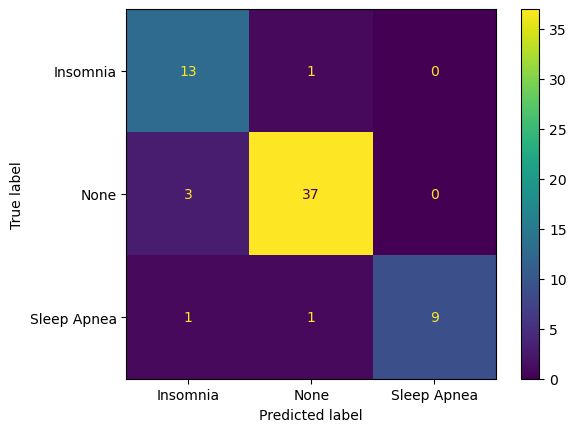

In [9]:
# evaluasi
accuracy = accuracy_score(y_test, y_pred)
print('accuracy: ' + str(round(accuracy,4)))

precision = precision_score(y_test, y_pred, average='macro')
print('precision: ' + str(round(precision,4)))

recall =  recall_score(y_test, y_pred, average='macro')
print('recall: ' + str(round(recall,4)))

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_).plot()